In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69db14eb10>,
      dtype=object)

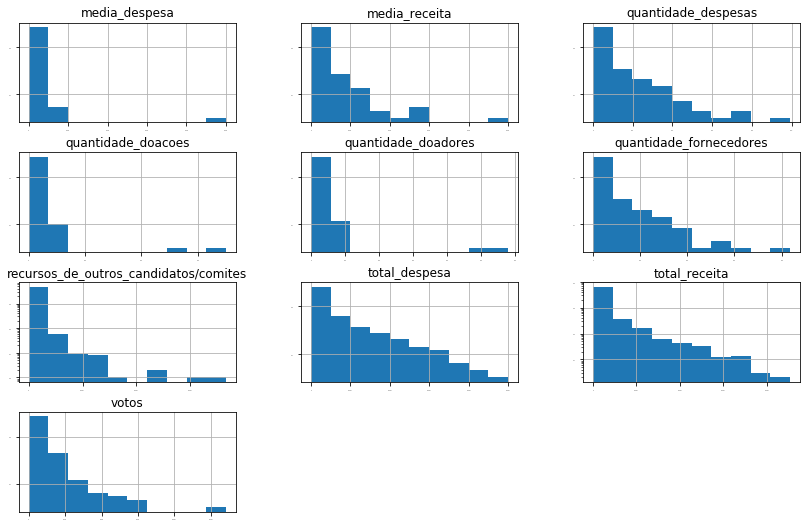

In [105]:
# Dados referentes as votações que candidatos à Câmara Federal de Deputados receberam nos anos de 2006 e 2010.
points = pd.read_csv("../data/eleicoes_2006_a_2010.csv")

matplotlib.rcParams['figure.figsize'] = (14.0, 9.0)

#histograma das variáveis numéricas
dist_feats = pd.DataFrame({ "quantidade_doacoes":points["quantidade_doacoes"],
                            "quantidade_doadores":points["quantidade_doadores"],
                            "total_receita":points["total_receita"],
                            "media_receita":points["media_receita"],
                            "recursos_de_outros_candidatos/comites":points["recursos_de_outros_candidatos/comites"],
                            "quantidade_despesas":points["quantidade_despesas"],
                            "quantidade_fornecedores":points["quantidade_fornecedores"],
                            "total_despesa":points["total_despesa"],
                            "media_despesa":points["media_despesa"],
                            "votos":points["votos"]
                          })

dist_feats.hist(log=True, xlabelsize=0, ylabelsize=0)                

Todos os atributos numéricos possuem viés para direita, neste caso é preciso normalizar-los. Atributos irrelevantes como `sequencial_candidato` e `nome` podem ser removidos. Valores faltantes foram substituídos pela média do respectivo atributo. Os dados de treino e validação foram divididos de acordo com o ano, 2006 treino e 2010 validação.

In [106]:
#removendo variáveis irrelevantes
points = points.drop(columns=['sequencial_candidato', 'nome', 'media_receita', 'media_despesa'])

#calculando skew
# skewed_feats = points[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index

#filling NA's with the mean of the column:
points = points.fillna(points.mean())

#selecionando atributos numéricos
numeric_feats = points.dtypes[points.dtypes != "object"].index

#normalizando atributos numéricos exceto ano
points[numeric_feats[1 :]] = np.log1p(points[numeric_feats[1:]])

#convertendo variáveis categóricas em dummy
points = pd.get_dummies(points)

#particionando os dados
from sklearn.model_selection import train_test_split
Y = points.loc[:,'votos']
X = points.drop(columns=['votos'])

#seleção aleatória de ..
train, validation, y_train, y_validation = train_test_split(X, Y)

Função para calcular o rmse com validação cruzada

In [107]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv=5))
    return(rmse)

### Regressão Linear Múltipla

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg_linear = LinearRegression()
rmse_cv(reg_linear).mean()

345466523.44570625

### Ridge

Text(0,0.5,'rmse')

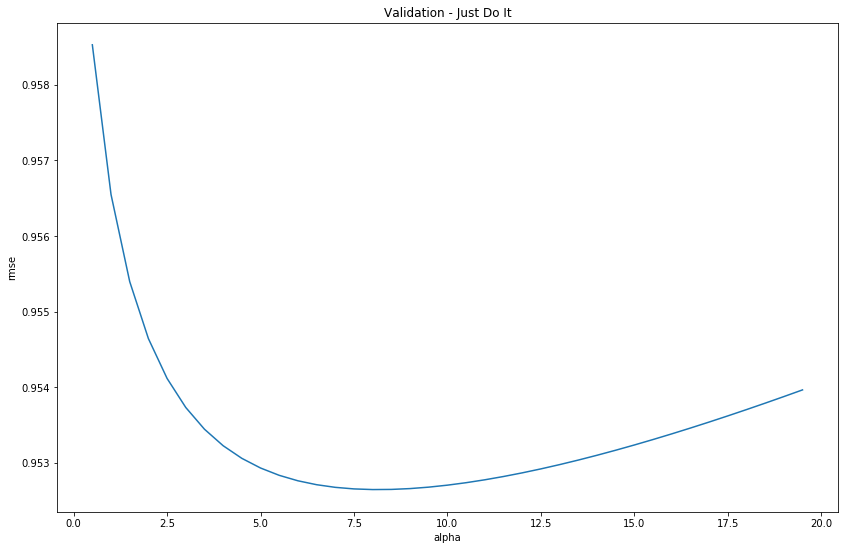

In [109]:
from sklearn.linear_model import Ridge
alphas_ridge = np.arange(0.5,20,0.5).tolist()
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas_ridge]
cv_ridge = pd.Series(cv_ridge, index = alphas_ridge)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

### Lasso

Text(0,0.5,'rmse')

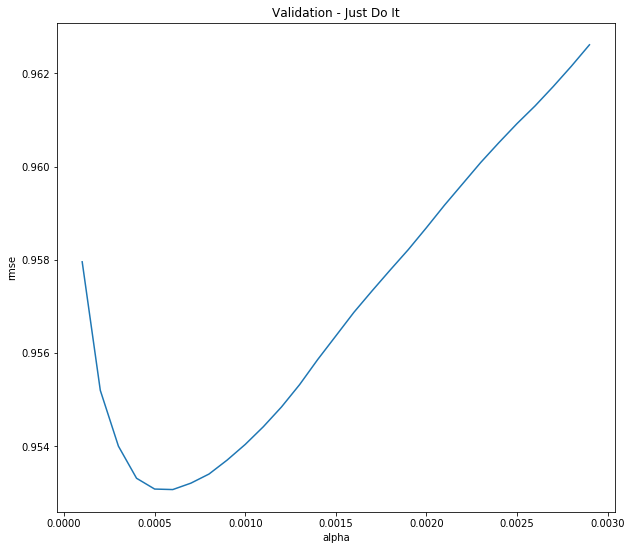

In [110]:
from sklearn.linear_model import Lasso
alphas_lasso = np.arange(0.0001,0.003,0.0001).tolist()

cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=8000)).mean() 
            for alpha in alphas_lasso]

matplotlib.rcParams['figure.figsize'] = (10.0, 9.0)
cv_lasso = pd.Series(cv_lasso, index = alphas_lasso)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(train, y_train)

Text(0,0.5,'rmse')

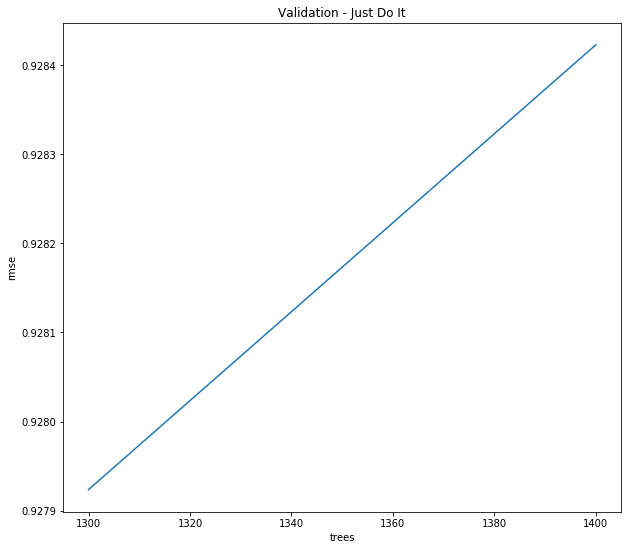

In [132]:
from sklearn.ensemble import RandomForestRegressor

n_tree = np.arange(1300,1500,100).tolist()

cv_randomforest = [rmse_cv(RandomForestRegressor(max_depth= 27, n_estimators= tree)).mean() 
            for tree in n_tree]

matplotlib.rcParams['figure.figsize'] = (10.0, 9.0)
cv_randomforest = pd.Series(cv_randomforest, index = n_tree)
cv_randomforest.plot(title = "Validation - Just Do It")
plt.xlabel("trees")
plt.ylabel("rmse")

### KNN

Text(0,0.5,'rmse')

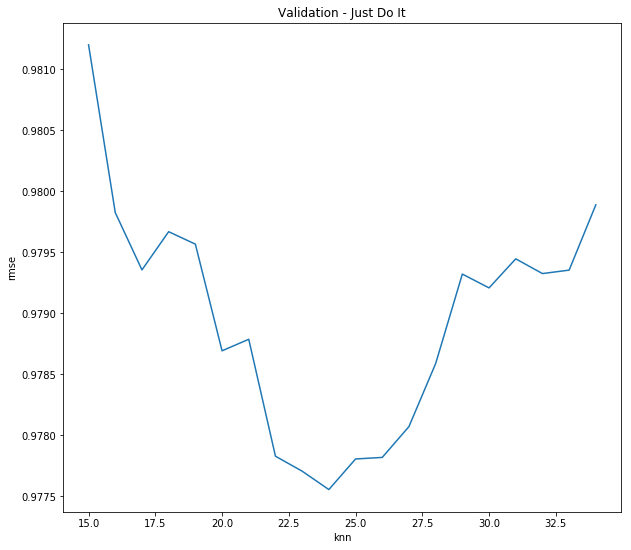

In [123]:
from sklearn.neighbors import KNeighborsRegressor

neighbors = np.arange(15,35,1).tolist()

cv_knn = [rmse_cv(KNeighborsRegressor(n_neighbors=neighbor)).mean() 
            for neighbor in neighbors]

matplotlib.rcParams['figure.figsize'] = (10.0, 9.0)
cv_knn = pd.Series(cv_knn, index = neighbors)
cv_knn.plot(title = "Validation - Just Do It")
plt.xlabel("knn")
plt.ylabel("rmse")